<a href="https://colab.research.google.com/github/1oneweeek/Pyt_MCR/blob/main/DecisionTree%26RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # 그래프 그리는 용도

In [2]:
#타이타닉 승객 데이터 불러오기
df_titanic = pd.read_csv("/content/sample_data/Titanic.csv")
print(df_titanic.shape)
df_titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#결측치 개수 확인
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Embarked 결측치 제거
df_titanic.dropna(subset=['Embarked'], axis=0, inplace=True)

In [5]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
#나이 평균
age_mean = int(df_titanic['Age'].mean())
age_mean

29

In [7]:
df_titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [8]:
#평균 나이로 결측치 대체
df_titanic['Age'].fillna(age_mean, inplace=True)

In [9]:
df_titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [10]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
#이름 대신 Title(호칭) 가져오기
df_titanic['Title'] = df_titanic['Name'].str.extract(' ([A-Za-z]+)\.')
#str.extract: 특정 조건의 문자를 추출해줌,[A-Za-z]: 알파벳으로 이루어진 문자,
#+: 1번 이상 반복된 것, \.은 온점을 특정함, 따라서 ([A-Za-z]+)\. 는 온점과 그 앞에 있는 알파벳으로 이루어진 한 단어(Mr., Mrs.등)

In [13]:
#성별에 따른 호칭
pd.crosstab(df_titanic['Title'],df_titanic['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
#범주 묶기
df_titanic['Title'] = df_titanic['Title'].replace('Mlle', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Mme', 'Mrs')
df_titanic['Title'] = df_titanic['Title'].replace('Ms', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace(['Capt', 'Col',
                                                   'Countess', 'Don',
                                                   'Dona', 'Dr',
                                                   'Jonkheer', 'Lady',
                                                   'Major', 'Rev',
                                                   'Sir'], 'Other')

In [15]:
df_titanic['Title']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Title, Length: 889, dtype: object

In [16]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [17]:
#인공지능 학습에 필요없는 속성 제거
df_titanic.drop('PassengerId', axis=1, inplace=True)
df_titanic.drop('Name', axis=1, inplace=True)
df_titanic.drop('Ticket', axis=1, inplace=True)
df_titanic.drop('Cabin', axis=1, inplace=True)

In [18]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,29.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [19]:
#성별 데이터 숫자로 변환
df_titanic['Sex'] = df_titanic['Sex'].replace('male', 1)
df_titanic['Sex'] = df_titanic['Sex'].replace('female', 2)

In [20]:
#승선 항구 데이터 숫자로 변환
df_titanic['Embarked'] = df_titanic['Embarked'].replace('S', 1)
df_titanic['Embarked'] = df_titanic['Embarked'].replace('C', 2)
df_titanic['Embarked'] = df_titanic['Embarked'].replace('Q', 3)

In [21]:
#호칭 데이터 숫자로 변환
df_titanic['Title'] = df_titanic['Title'].replace('Other', 0)
df_titanic['Title'] = df_titanic['Title'].replace('Miss', 1)
df_titanic['Title'] = df_titanic['Title'].replace('Mrs', 2)
df_titanic['Title'] = df_titanic['Title'].replace('Mr', 3)
df_titanic['Title'] = df_titanic['Title'].replace('Master', 4)

In [22]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,1,3
1,1,1,2,38.0,1,0,71.2833,2,2
2,1,3,2,26.0,0,0,7.9250,1,1
3,1,1,2,35.0,1,0,53.1000,1,2
4,0,3,1,35.0,0,0,8.0500,1,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,0
887,1,1,2,19.0,0,0,30.0000,1,1
888,0,3,2,29.0,1,2,23.4500,1,1
889,1,1,1,26.0,0,0,30.0000,2,3


1. 의사결정 트리 모델 만들기

In [23]:
#종속변수(Y)와 독립변수(X)
Y = df_titanic['Survived']
X = df_titanic.drop('Survived', axis=1)

In [24]:
#훈련 데이터와 테스트 데이터
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((622, 8), (267, 8), (622,), (267,))

In [25]:
#의사결정 트리 알고리즘 호출 및 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [26]:
#테스트 데이터 예측
dt_prediction = dt.predict(X_test)

In [27]:
#예측값과 실제값을 비교해 정확도 구하기
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, dt_prediction)

0.7715355805243446

In [28]:
#혼동행렬과 평가 결과 확인
from sklearn.metrics import classification_report, confusion_matrix
print('오차 행렬\n', confusion_matrix(Y_test, dt_prediction))
print('\n평가 지표\n', classification_report(Y_test, dt_prediction))

오차 행렬
 [[129  31]
 [ 30  77]]

평가 지표
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       160
           1       0.71      0.72      0.72       107

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



In [29]:
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz

dt_dot_data = export_graphviz(dt, out_file=None,
                class_names=["Not Survived", "Survived"],
                feature_names=X_train.columns,
                impurity=True, # gini 계수 출력
                filled=True) # class별 color 채우기

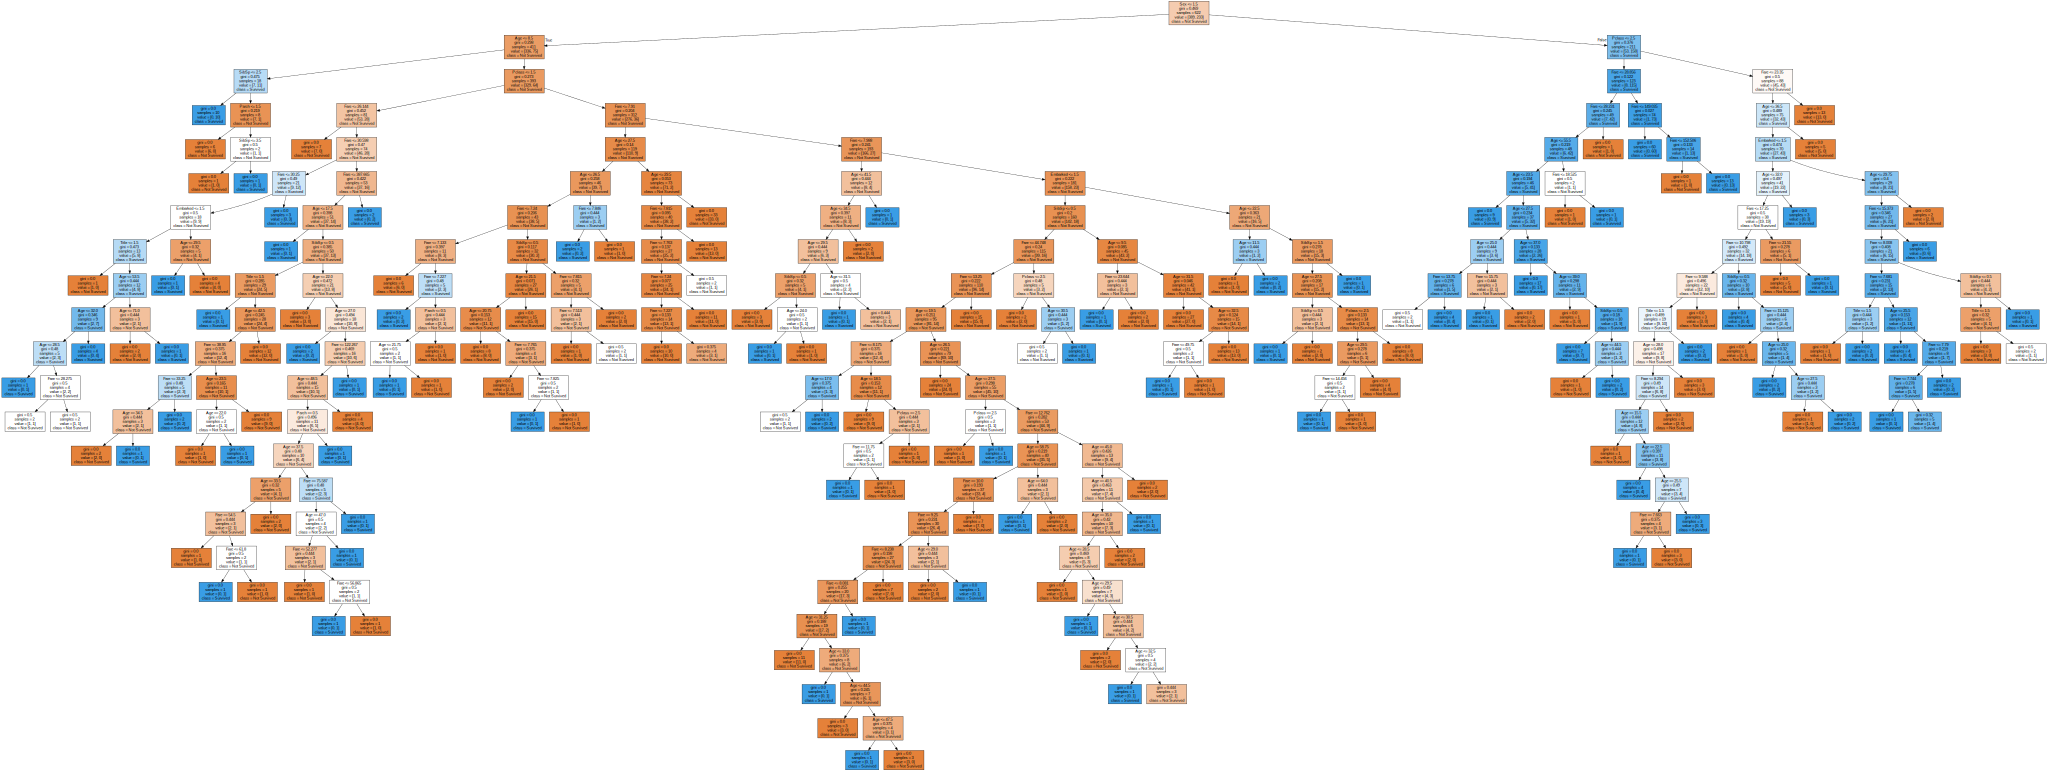

In [30]:
graphviz.Source(dt_dot_data)

In [31]:
import pydotplus

In [32]:
#.dot 파일 불러오기
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [33]:
#의사결정 트리 모델 시각화 파일 png 형식으로 저장
dt_graph.write_png("Titanic_Tree.png")

True

2. 랜덤포레스트 모델 만들기

In [34]:
# 랜덤포레스트 모델 정의
from sklearn.ensemble import RandomForestClassifier

# 트리 개수 최대 50개
rf = RandomForestClassifier(n_estimators=50,
                            max_features=8, random_state=7)
rf.fit(X_train , Y_train)

RandomForestClassifier(max_features=8, n_estimators=50, random_state=7)

In [35]:
# 의사결정트리 테스트
rf_prediction = rf.predict(X_test)

In [36]:
# 정확도 출력
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, rf_prediction)

0.846441947565543

In [37]:
# 랜덤포레스트 평가
from sklearn.metrics import classification_report, confusion_matrix
rf_prediction = rf.predict(X_test)

print('오차 행렬\n', confusion_matrix(Y_test, rf_prediction))
print('\n평가 지표\n', classification_report(Y_test, rf_prediction))

오차 행렬
 [[141  19]
 [ 22  85]]

평가 지표
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       160
           1       0.82      0.79      0.81       107

    accuracy                           0.85       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267



# Gini 계수 탐구하기

In [38]:
#X_train 데이터와 Y_train 데이터 합치기
train_data = X_train
train_data['Survived'] = Y_train.values

In [39]:
#생존 여부로 묶은 후 데이터 수 출력
train_data.groupby('Survived')['Sex'].count()

Survived
0    389
1    233
Name: Sex, dtype: int64

In [40]:
#성별에 따른 생존 여부 데이터 수 출력
train_data.groupby('Sex')['Survived'].value_counts()

Sex  Survived
1    0           336
     1            75
2    1           158
     0            53
Name: Survived, dtype: int64